In [1]:
import kdsource as kds
import numpy as np
import matplotlib.pyplot as plt

In [2]:

fuente = kds.SurfaceSourceFile('surface_source.mcpl',domain={'w':[0,1]})
source = fuente.get_pandas_dataframe()

Number of particles in file surface_source.mcpl: 3514158
100% n, 0% g, 0% e-, 0% e+, 0% p, 


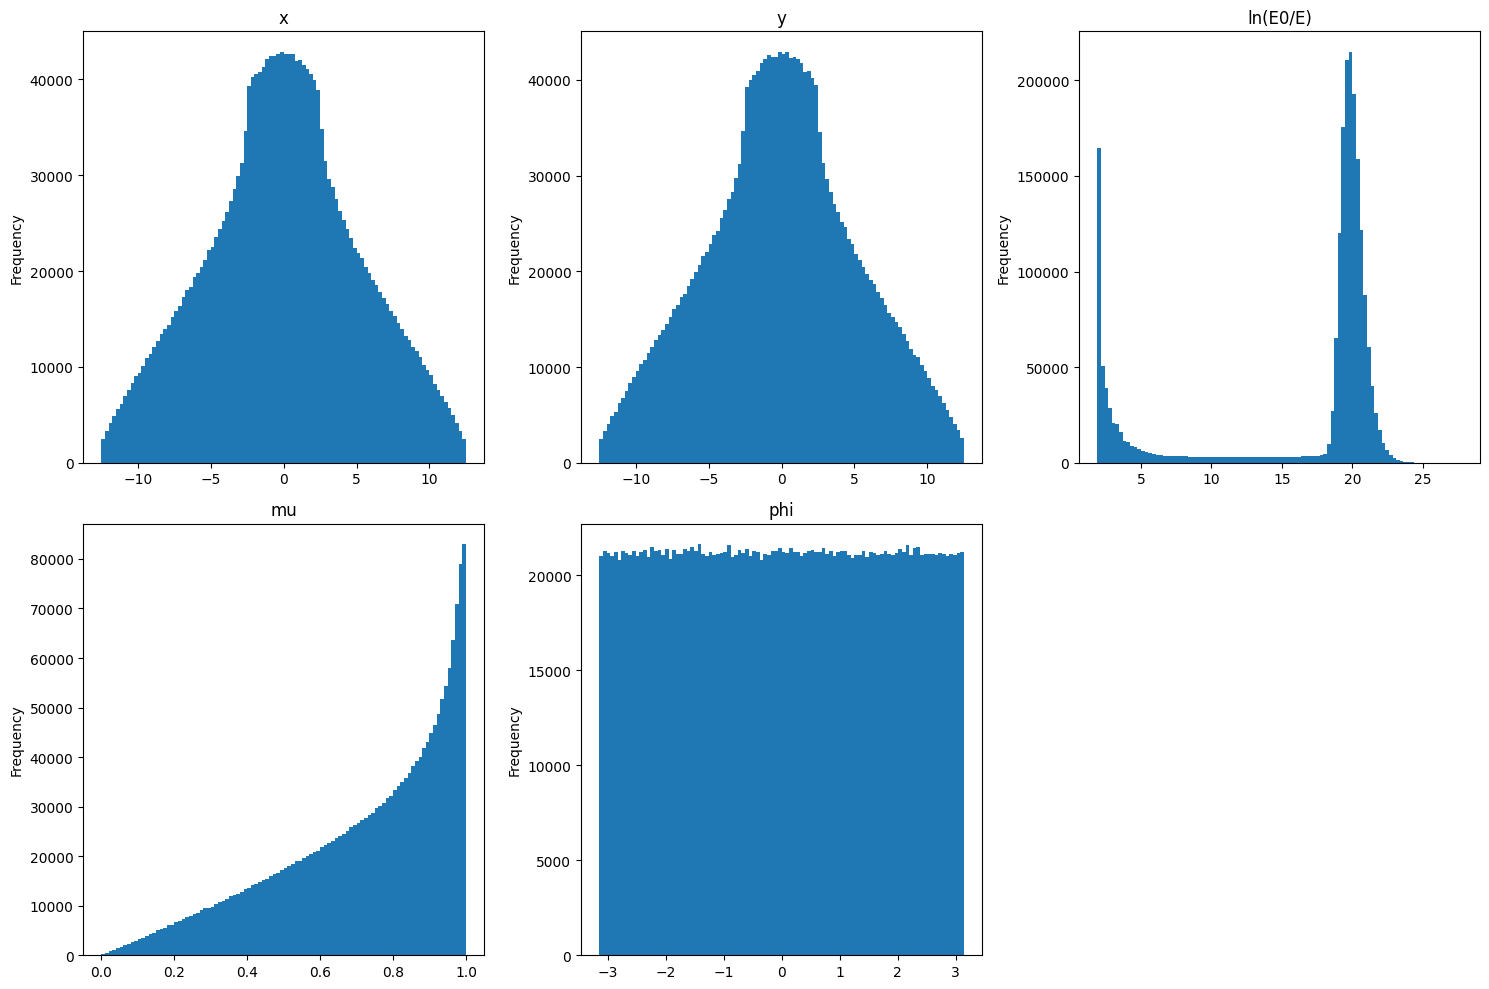

In [3]:
# Specify the columns you want to plot
columns_to_plot = ['x', 'y', 'ln(E0/E)', 'mu', 'phi']

# Create a figure with subplots for 5 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjust the layout to fit 5 plots (2 rows, 3 columns)
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot a histogram for each specified column
for i, col in enumerate(columns_to_plot):
    source[col].plot(kind='hist', ax=axes[i], title=col, bins=100)  # Adjust bins as needed
    axes[i].set_ylabel('Frequency')  # Optional: to add ylabel to each plot

# Remove any empty subplot (since we have 6 plots but only want to use 5)
fig.delaxes(axes[-1])

plt.tight_layout()  # Adjust layout so plots don't overlap

# Save the figure as a PNG file
plt.savefig('histograms.png', dpi=300)

plt.show()

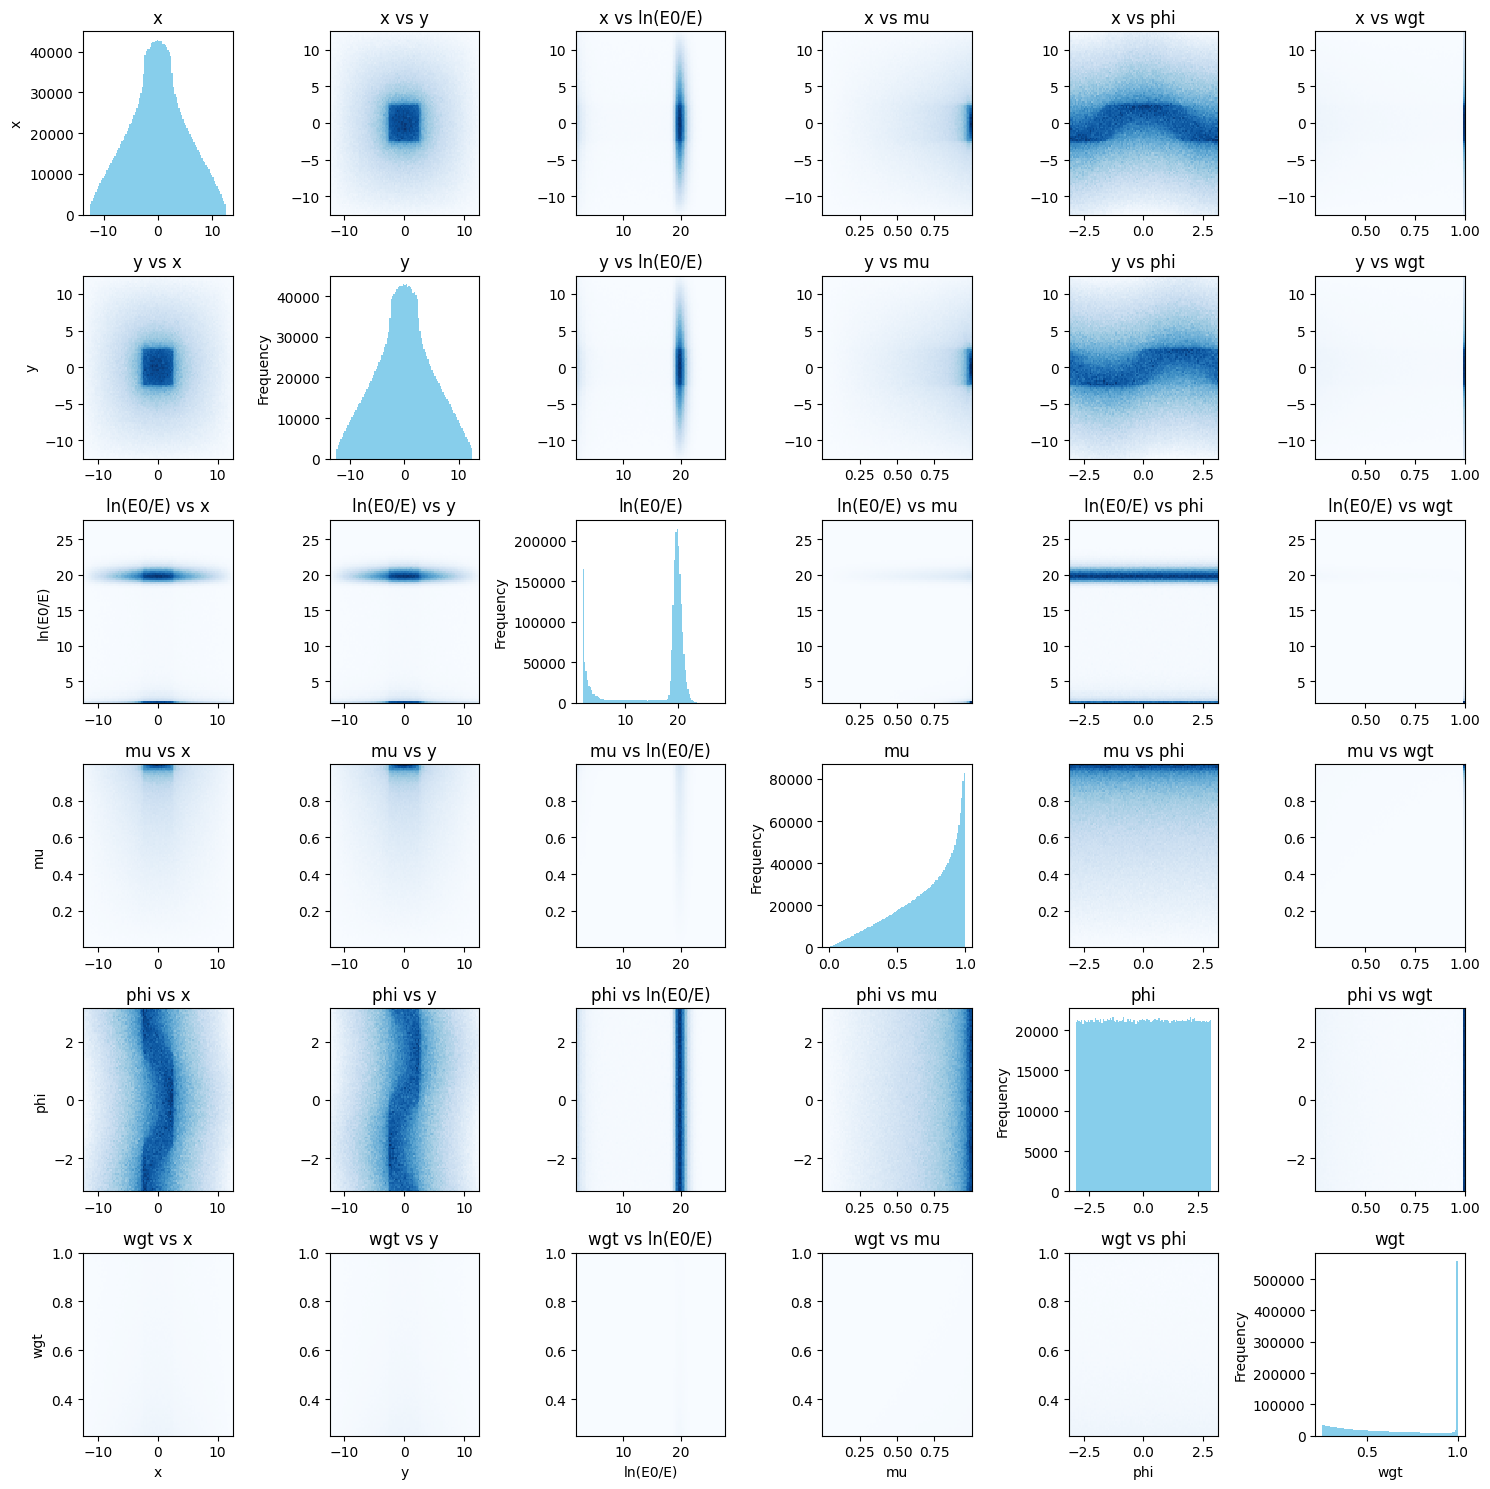

In [8]:
# Specify the columns you want to plot
columns_to_plot = ['x', 'y', 'ln(E0/E)', 'mu', 'phi', 'wgt']

# Create a figure with a 5x5 grid of subplots
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15, 15))  # 6x6 grid

# Iterate through the rows and columns for the 6x6 plot
for i, col1 in enumerate(columns_to_plot):
    for j, col2 in enumerate(columns_to_plot):
        if i == j:
            # Diagonal plots: Plot histograms when col1 == col2
            source[col1].plot(kind='hist', ax=axes[i, j], bins=100, color='skyblue', title=f'{col1}')
        else:
            # Off-diagonal plots: 2D histograms (heatmap-like) for col1 vs col2
            axes[i, j].hist2d(source[col2], source[col1], bins=100, cmap='Blues')
            axes[i, j].set_title(f'{col1} vs {col2}')
        # Optional: Set labels
        if i == len(columns_to_plot) - 1:
            axes[i, j].set_xlabel(col2)
        if j == 0:
            axes[i, j].set_ylabel(col1)

plt.tight_layout()  # Adjust layout to prevent overlap

# Save the figure as a PNG file
plt.savefig('correlated_plots.png', dpi=300)

plt.show()